In [1]:
# =============================================================================
#
# Pronositco usando un MLP con la serie sin diferenciar y sin escalar
#
# =============================================================================
import warnings

warnings.filterwarnings("ignore")

#
# Carga de datos
#
import functions  #  type: ignore


df_orig = functions.load_data()
df_orig.head()

,yt_true
date,
1946-01-01,890
1946-02-01,992
1946-03-01,979
1946-04-01,959
1946-05-01,1110


In [2]:
#
# Construcción de la matriz de regresores
#

df_orig = functions.make_lagged_ts(
    df=df_orig,
    p_max=13,
    y_column="yt_true",
    fmt="lagged_{}m",
)
df_orig.head()

,yt_true,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,lagged_9m,lagged_10m,lagged_11m,lagged_12m,lagged_13m
date,,,,,,,,,,,,,,
1946-01-01,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-02-01,992,890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-03-01,979,992.0,890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-04-01,959,979.0,992.0,890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1946-05-01,1110,959.0,979.0,992.0,890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#
# Remoción de los valores faltantes
#
df_dropna = df_orig.dropna()

In [4]:
#
# División de los datos en entrenamiento y prueba
#
(
    X_complete,
    y_complete,
    X_train,
    y_train,
    X_test,
    y_test,
) = functions.train_test_split(
    df=df_dropna,
    x_columns=[f"lagged_{i}m" for i in range(1, 13)],
    y_column="yt_true",
)

In [5]:
#
# Pronostico usando una red neuronal tipo MLP
#
from sklearn.neural_network import MLPRegressor  #  type: ignore


def create_pipeline(hidden):

    return MLPRegressor(
        hidden_layer_sizes=(hidden,),
        activation="logistic",
        learning_rate="adaptive",
        momentum=0.01,
        learning_rate_init=0.2,
        max_iter=10000,
        random_state=123456,
    )

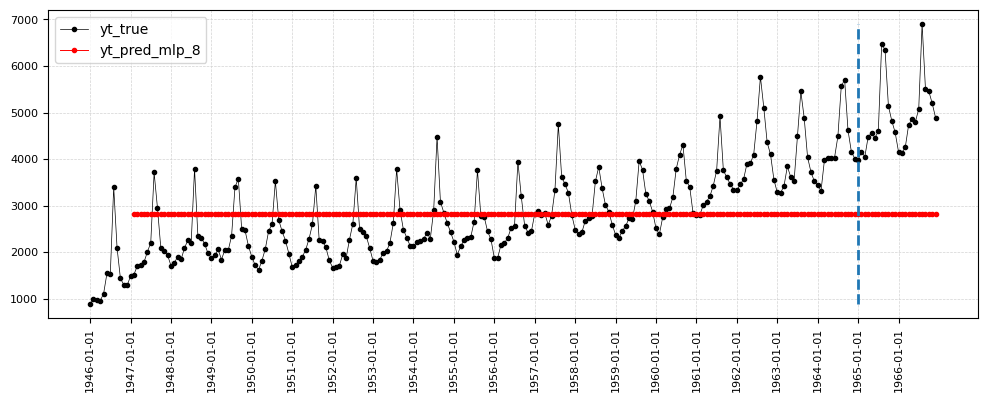

In [6]:
#
# Entrenamiento y pronostico
#
hidden = 8
pipeline = create_pipeline(hidden=hidden)
pipeline.fit(X_train, y_train)
df_dropna[f"yt_pred_mlp_{hidden}"] = pipeline.predict(X_complete)
df_orig.loc[df_dropna.index, f"yt_pred_mlp_{hidden}"] = df_dropna[
    f"yt_pred_mlp_{hidden}"
]

functions.plot_time_series(df=df_orig, yt_col="yt_true")

In [7]:
#
# Métricas de error
#
metrics = functions.compute_evaluation_metrics(df_dropna)
metrics

,Metrics,yt_pred_mlp_8
0,MSE Train,788902.99
1,MSE Test,4944170.60
2,MAE Train,716.27
3,MAE Test,2089.82
